# GRIP : The Spark Foundation ( Data Science and Business Analytics Intern )

## Author :Dhivya S

### Prediction using Supervised ML 
#### (Level - Beginner)
● Predict the percentage of an student based on the no. of study hours.   
● This is a simple linear regression task as it involves just 2 variables.  
● You can use R, Python, SAS Enterprise Miner or any other tool   
● Data can be found at http://bit.ly/w-data  
● What will be predicted score if a student studies for 9.25 hrs/ day?   
● Sample Solution : https://bit.ly/2HxiGGJ  


###### Supervised machine learningis a type of machine learning in which the machine is fed the training data which is labelled. Supervised machine learning is further categorized into regression and classification

##### Linear regression is probably the simplest approach for statistical learning. It is a good starting point for more advanced approaches, and in fact, many fancy statistical learning techniques can be seen as an extension of linear regression. Therefore, understanding this simple model will build a good base before moving on to more complex approaches.Output type- continuous (number)

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import scikitplot as skplt

### Importing dataset 

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [4]:
df.shape

(25, 2)

In [5]:
df.ndim

2

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [9]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
df.min()

Hours      1.1
Scores    17.0
dtype: float64

In [11]:
df.max()

Hours      9.2
Scores    95.0
dtype: float64

In [12]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [13]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

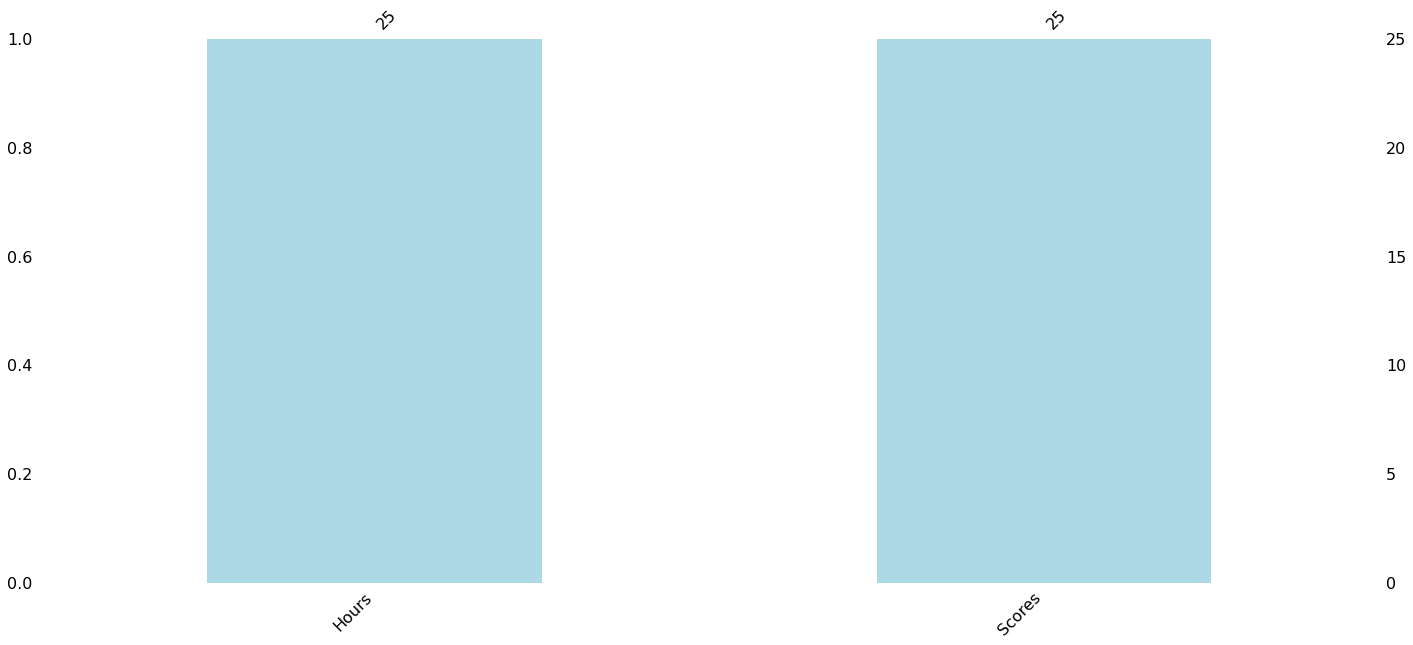

In [15]:
import missingno as no
no.bar(df,color='lightblue')
plt.show()

### Data Visulalization

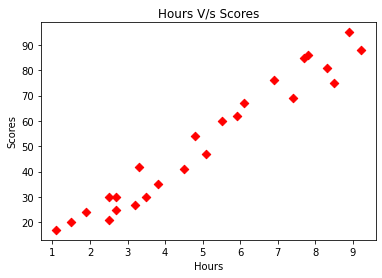

In [18]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours V/s Scores')
plt.scatter(df['Hours'],df['Scores'],color='red',marker='D')
plt.show()

In [19]:
import pingouin as pg

In [20]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Scores,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.Scores,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.Scores,hue='Scores',data=df,ax=axes[2][0],palette='Pastel1')
    pg.plot_blandaltman(x=df.Scores, y=df[a],ax=axes[2][1])
    plt.suptitle(a.title())
    plt.show()

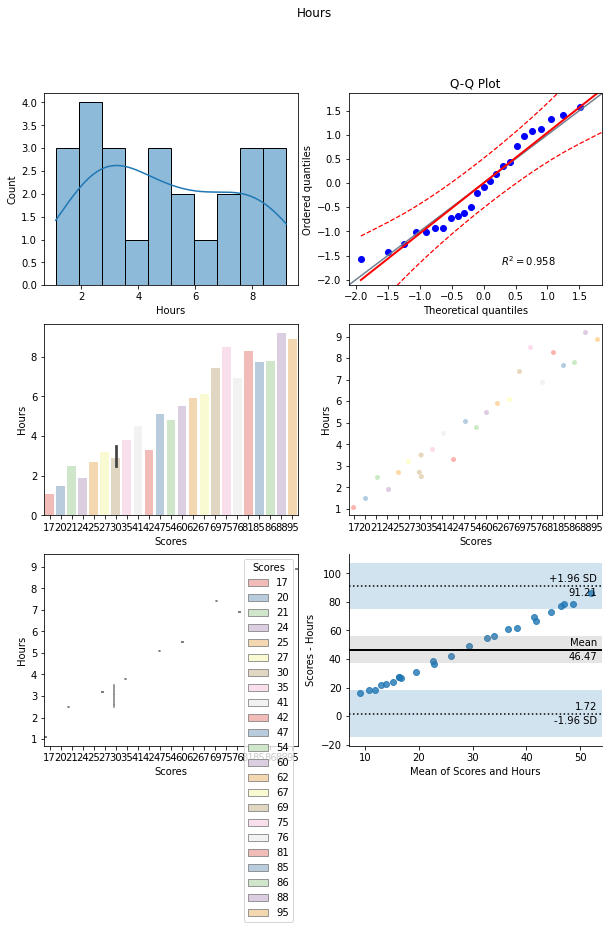

In [21]:
plot_num('Hours')

C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SARAVANAN DIVYA\New folder\lib\site-packages\seaborn\distributions.py:305: UserWa

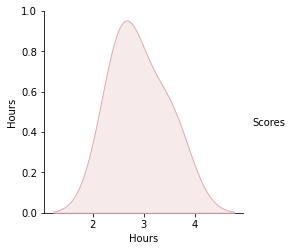

In [22]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Scores',height=3.5)
plt.show()

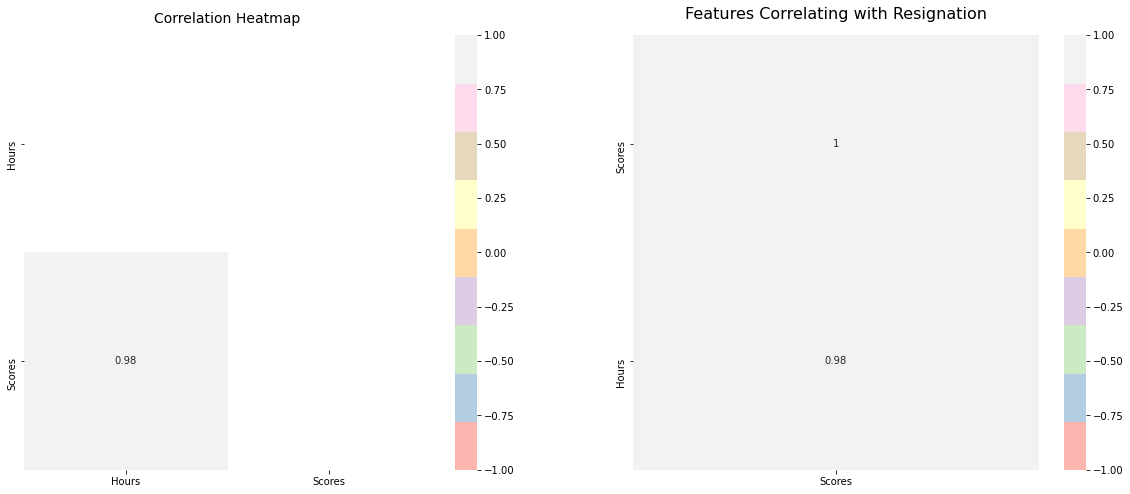

In [23]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Scores']].sort_values(by='Scores',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

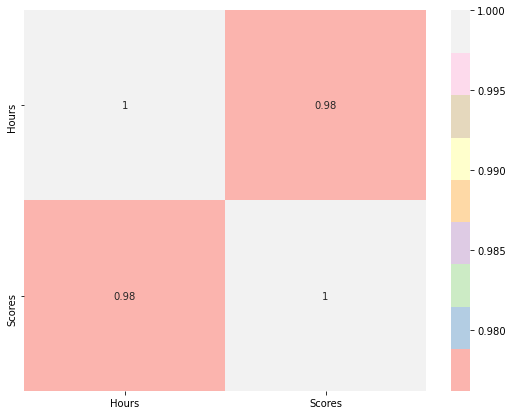

In [24]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

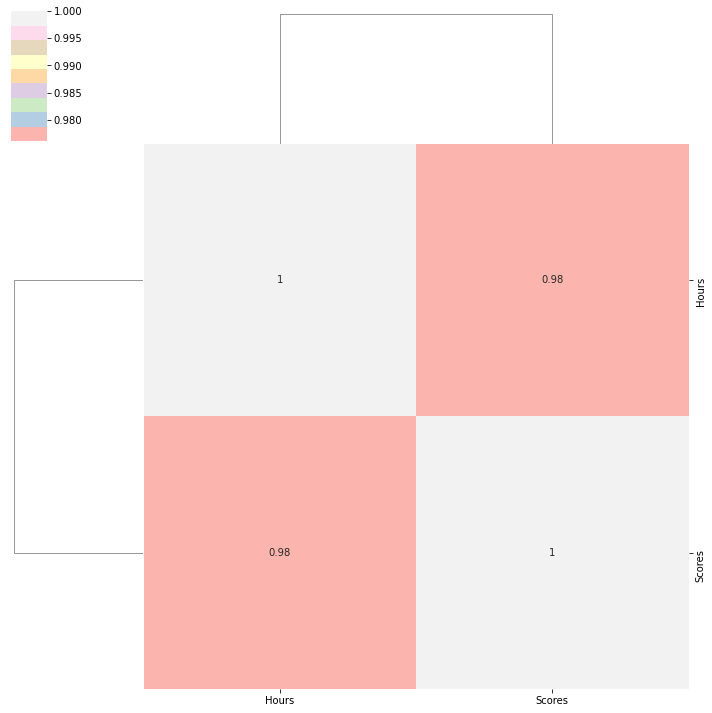

In [25]:
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')

### Dataset is going to be divided into two parts dependent and independent variables or Diving Dataset into Features (inputs) and labels (outputs)

In [27]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [28]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [29]:
y[:5]

array([21, 47, 27, 75, 30], dtype=int64)

### Splitting the dataset into Training and Testing set

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [33]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df1 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [34]:
from sklearn.metrics import mean_squared_error, r2_score  
mse = mean_squared_error(y_test, y_pred)
print(mse)

68.88092074277635


In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.882398086270432
Mean Squared Error: 68.88092074277635
Root Mean Squared Error: 8.299453038771674


### Plotting for the training dataset

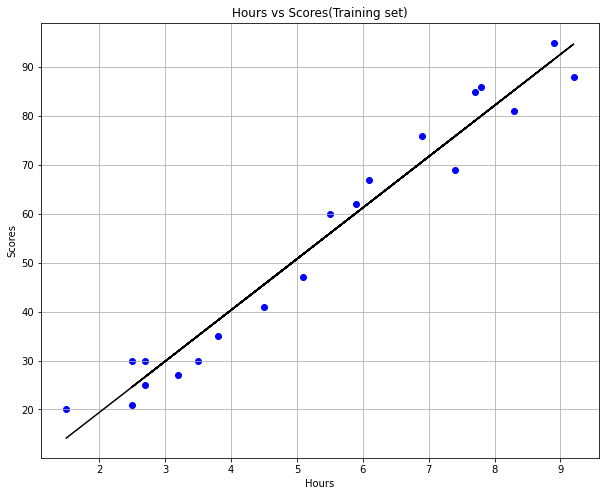

In [36]:
plt.figure(figsize=(10,8))
plt.grid()
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train,model.predict(X_train),color='black')
plt.title('Hours vs Scores(Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Plotting for the testing dataset

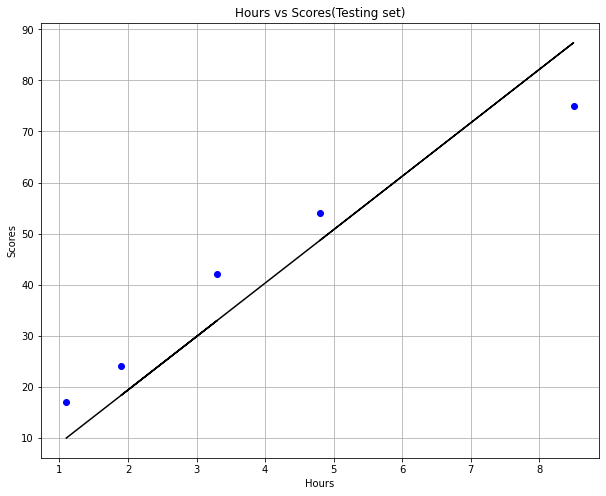

In [37]:
plt.figure(figsize=(10,8))
plt.grid()
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,model.predict(X_test),color='black')
plt.title('Hours vs Scores(Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [38]:
h=9.25
s=model.predict([[h]])
print("If a student studies for {} hours per dayhe/She will Score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per dayhe/She will Score [95.22829438] % in exam.


In [39]:
df.to_csv("data.csv")

In [42]:
import pickle
pickle.dump(model,open("model1.pkl","wb"))